For the notebook to be opertaional you can use this environment 
     
      source /afs/cern.ch/user/k/kostams/public/VirtualEnv/env.sh

In [2]:
%pylab inline
import pandas as pd
import numpy  as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as s
from matplotlib.colors import LogNorm
s.set(rc={'image.cmap': "jet"})
figsize(12,10)
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['savefig.facecolor'] = (1,1,1,1)

In [4]:
def plot_matrix(frame, **args):
    from matplotlib.colors import LogNorm
    x,y = np.meshgrid(np.array(frame.index,   dtype=float),
                      np.array(frame.columns, dtype=float))
    z = frame.T.values.astype(float)
    ret = gca().pcolor(y,x,z, **args)
    (lambda x: xlim(x[0],x[-1]))(frame.columns)
    (lambda x: ylim(x[0],x[-1]))(frame.index  ) 
    return ret

# This creates the resolution tensors and writes them to csvs

In [5]:
# There are the bins from the JS app
betaTheoretic = np.array([ 
    0.4, 0.4147083427294357, 0.4297280251026429, 0.4450403909356994, 0.4606240084534386, 0.4764546384120651, 
         0.4925052439125105, 0.5087460471842641, 0.5251446378598004, 0.5416661361701296, 0.5582734130726269, 
         0.5749273675970504, 0.5915872597150694, 0.6082110948808858, 0.6247560541596080, 0.6411789616808273, 
         0.6574367791650310, 0.6734871156098977, 0.6892887390214797, 0.7048020764378558, 0.7199896884909629, 
         0.7348167054129555, 0.7492512126947839, 0.7632645764764647, 0.7768317010774621, 0.7899312137155933, 
         0.8025455742483953, 0.8146611105322752, 0.8262679825729968, 0.8373600809008588, 0.8479348664431029, 
         0.8579931605210849, 0.8675388944464776, 0.8765788285418612, 0.8851222503098053, 0.8931806609871203, 
         0.9007674589276944, 0.9078976272444162, 0.9145874319927806, 0.9208541359733099, 0.9267157320331831, 
         0.9321906986122767, 0.9372977792440818, 0.9420557868130696, 0.9464834326004606, 0.9505991795234627, 
         0.9544211184844238, 0.9579668663859606, 0.9612534841221809, 0.9642974127088534, 0.9671144256503917,
         0.9697195956427809, 0.9721272737641616, 0.9743510793953442, 0.9764038992294443, 0.9782978938634144, 
         0.9800445106065235, 0.9816545012855892, 0.9831379439691663, 0.9845042676694992, 0.9857622792093981, 
         0.9869201915597940, 0.9879856530617125, 0.9889657770435114, 0.9898671714305440, 0.9906959680203582, 
         0.9914578511627253, 0.9921580856409233, 0.9928015435995934, 0.9933927304059403, 0.9939358093658833, 
         0.9944346252457511, 0.9948927265739774, 0.9953133867166960, 0.9956996237367265, 0.9960542190577868, 
         0.9963797349653267, 0.9966785309825973, 0.9969527791658416, 0.9972044783661363, 0.9974354675077245, 
         0.9976474379339008, 0.9978419448718635, 0.9980204180675922, 0.9981841716409147, 0.9983344132096104, 
         0.9984722523297661, 0.9985987082977400, 0.9987147173570756, 0.9988211393515946, 0.9989187638637343, 
         0.9990083158750230, 0.9990904609834247, 0.9991658102101691, 0.9992349244266255, 0.9992983184297834, 
         0.9993564646930042, 0.9994097968168774, 0.9994587127032906, 0.9995035774741808, 0.9995447261548852,
         0.9995824661405623, 0.9996170794627837, 0.9996488248721179, 0.9996779397513396, 0.9997046418727785 
])
mp, md = 0.9382, 1.8756
rgdtTheoretic = mp * betaTheoretic / np.sqrt(1 - betaTheoretic**2)

In [6]:
from bq_hist import get_hist_series

In [7]:
betaMeasured=np.linspace(0.4,1.5,100)
rgdtMeasured=np.linspace(0.0, 15,151)

In [18]:
genBeta = "GenMomentum/SQRT(0.88022 + POW(GenMomentum,2))"
varNames = [('BetaTOF',  'Beta',   betaMeasured ),
            ('R',        'R',   rgdtMeasured ),
            (genBeta,    'TrueB', betaTheoretic)]

# Read proton MC
seriesB1034 = get_hist_series('AMS.protonsB1034',varNames)
seriesB800  = get_hist_series('AMS.protonsB800', varNames)

# Read deuteron MC
genBeta = "GenMomentum/SQRT(3.515625 + POW(GenMomentum,2))"
varNames = [('BetaTOF',  'Beta',   betaMeasured ),
            ('R',        'R',   rgdtMeasured ),
            (genBeta,    'TrueB', betaTheoretic)]
seriesDeut = get_hist_series('AMS.dB1030_GG_Blic',varNames)

#Read Data
seriesData = get_hist_series('AMS.Data',varNames[:-1])

Job not yet complete...
Job not yet complete...
Job not yet complete...
Job not yet complete...


In [19]:
save = False
if save:
    import gzip
    seriesB1034.to_csv(gzip.open("seriesB1034.csv.gz","w"))
    seriesB800.to_csv( gzip.open("seriesB800.csv.gz","w"))
    seriesData.to_csv(gzip.open("seriesData.csv.gz","w"))
    seriesDeut.to_csv(gzip.open("seriesDeuterons.csv.gz","w"))

# Load the csvs and do the work

In [20]:
load = False
if load:
    import gzip 
    args = { "header":None, "index_col": [0,1,2]}

    seriesB1034 = pd.Series.from_csv(gzip.open("seriesB1034.csv.gz","r"), **args)
    seriesB1034.index.names = ['Beta','R','TrueB']

    seriesB800  = pd.Series.from_csv(gzip.open("seriesB800.csv.gz","r"), **args)
    seriesB800.index.names = ['Beta','R','TrueB']

    seriesDeut  = pd.Series.from_csv(gzip.open("seriesDeuterons.csv.gz","r"), **args)
    seriesDeut.index.names = ['Beta','R','TrueB']

    args['index_col'] = [0,1]
    seriesData  = pd.Series.from_csv(gzip.open("seriesData.csv.gz","r"), **args)
    seriesData.index.names = ['Beta','R']

In [21]:
def expectedCounts(resolutions,fluxes,mask=None):
    """ Makes expectd counts given a list of fluxes and a list of resolution matrices"""
    expected = None
    for res,flux in zip(resolutions,fluxes):
        if expected is None:
            expected  = res.unstack(level=2).dot(flux)
        else:
            expected += res.unstack(level=2).dot(flux)
    if mask: expected[mask]=0
    return expected

def logLikelihood(obs, resolutions, fluxes, mask=None):
    """ Poissonian log likelihood for observed data and test fluxes"""
    expected = expectedCounts(resolutions, fluxes, mask)
    logP = obs * np.log(expected) - expected
    logP[expected < 1e-99] = 0
    return logP.sum()

def gradLogLikelihood(obs, resolutions, fluxes, mask=None):
    """ This calculates the gradient of the logLikelihood above at a given point"""
    expected = expectedCounts(resolutions, fluxes, mask)
    v = obs / expected - 1
    v[expected < 1e-99] = -1
    return [res.unstack(level=[0,1]).dot(v) for res in resolutions] 

In [22]:
# Numerical check that the gradient is ok
# Takes about 2 minutes
# Set frame = True to run
frame = False

flux = pd.Series(1, seriesB1034.index.levels[2])
ll = logLikelihood(seriesData, [seriesB800], [flux])

if frame:
    df, ngrad = 0.00001, []
    for i in range(len(flux)):
        print i,
        nflux = flux.copy()
        nflux.iloc[i] += df
        ngrad.append(logLikelihood(seriesData, [seriesB800], [nflux]) - ll)
    
    frame = pd.DataFrame({
        'ngrad':pd.Series(ngrad, index=flux.index)/df,
        'grad':gradLogLikelihood(seriesData, [seriesB800], [flux])[0]
    })
    
frame

False

# Masking (inclomplete)

In [69]:
# proton "flux" is  flat 1
# deuteron is flat 0.1 
fluxP = pd.Series(1.0,seriesB1034.index.levels[2])
fluxD = pd.Series(0.1,seriesB1034.index.levels[2])

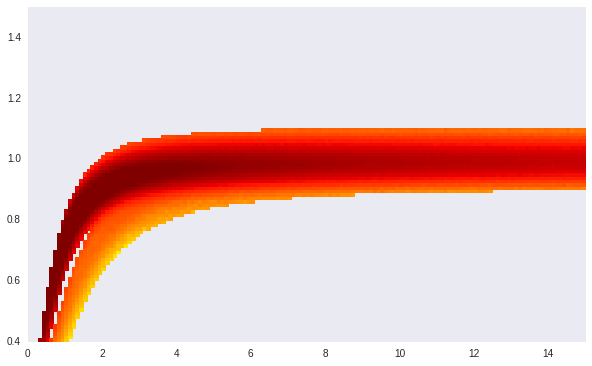

In [70]:
mp,md = 0.938, 1.875
def R_from_beta(beta, m=mp):
    return m*beta/np.sqrt(1-beta*beta)
def beta_from_R(R, m=mp):
    return R/np.sqrt(R**2+m**2)

expected = expectedCounts([seriesB800,seriesDeut], [fluxP,fluxD])

frame = expected.reset_index()
frame['mask'] = (frame['Beta'] > 0) & (frame['R'] > -0.1)
frame['mask'] &= np.abs(frame['Beta'] - beta_from_R(frame['R'],mp)) > 0.1
frame['mask'] &= np.abs(frame['Beta'] - beta_from_R(frame['R'],md)) > 0.1
#frame['mask'] &= np.abs(frame['R'] - R_from_beta(frame['Beta'],mp)) > 1
#frame['mask'] &= np.abs(frame['R'] - R_from_beta(frame['Beta'],md)) > 1

#plot_matrix(expected,norm=LogNorm(vmin=10**(-5),vmax=10000))
mask = frame.set_index(['Beta','R'])['mask']

expected[mask] = 0
plot_matrix(expected.unstack().iloc[1:,1:],norm=LogNorm(vmin=10**(-5),vmax=10000))


# Gradient descent (not even started)

# Plots for presentation

In [44]:
idx = seriesB1034.index.levels[2]
idMatr = pd.DataFrame(np.diag([1]*len(idx)), index=idx, columns=idx)

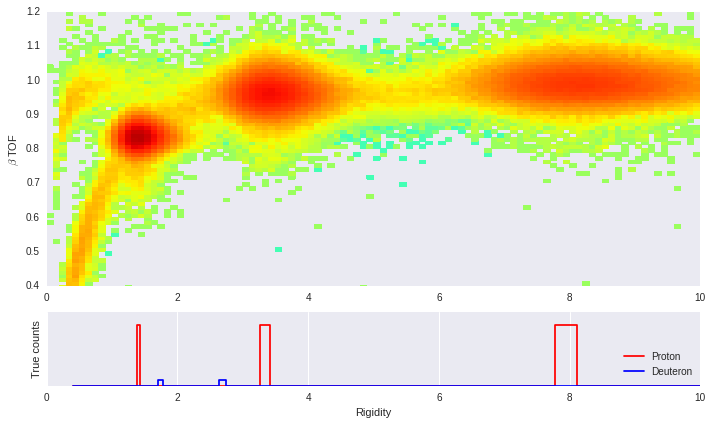

In [67]:
# Demonstration
figsize(10,6)

fluxP = idMatr.iloc[50]+idMatr.iloc[30]+idMatr.iloc[70]
fluxD = 0.1*(idMatr.iloc[35] + idMatr.iloc[45])

#fluxP = pd.Series(0.0,index=idMatr.index);fluxP *= (1+2*np.arctan((fluxP.index.map(R_from_beta)-2)*7)/np.pi)/2
#fluxD = pd.Series(0.1,index=idMatr.index);fluxD *= (1+2*np.arctan((fluxP.index.map(R_from_beta)-2)*20)/np.pi)/2

subplot2grid((4,1),(0,0),rowspan=3)
plot_matrix( 
    seriesB800.unstack(level=2).dot(fluxP).unstack() + 
    seriesDeut.unstack(level=2).dot(fluxD).unstack(),
    norm=LogNorm(vmin=10**(-5),vmax=20000)
)

ylabel("$\\beta$ TOF")
xlim(0,10); ylim(0.4,1.2)
subplot2grid((4,1),(3,0))

fluxP.index = fluxP.index.map(R_from_beta); 
plot(fluxP.index, fluxP.values, drawstyle="steps", color='r', label='Proton')
fluxD.index = fluxD.index.map(R_from_beta); 
plot(fluxD.index, fluxD.values, drawstyle="steps", color='b', label='Deuteron')
xlabel("Rigidity"); ylabel("True counts")
xlim(0,10);         ylim(0,1.2)
yticks([]); legend(loc=4)
tight_layout()